# Introduction to GANs with Tensorflow <a class="tocSkip">

[Tomas Beuzen](https://tomasbeuzen.github.io/) (May 2020)
    
---    

# Introduction

This tutorial is based on the [Deep Convolutional Generative Adversarial Network by Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan).

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

# A simple GAN

## Data preparation

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train[y_train == 0]  # we'll just work with 0's for now
y_train = y_train[y_train == 0]

Text(0.5, 1.0, 'This is a 0')

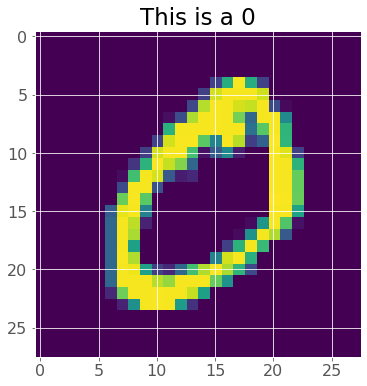

In [3]:
n = 0
plt.imshow(X_train[n])
plt.title(f"This is a {y_train[n]}")

## Define the models

In [4]:
np.random.seed(42)
tf.random.set_seed(42)
INPUT_SIZE = 100

### Generator

In [5]:
generator = tf.keras.Sequential()
generator.add(layers.Dense(100, activation="relu", input_shape=[INPUT_SIZE]))
generator.add(layers.Dense(150, activation='relu'))
generator.add(layers.Dense(784, activation="sigmoid")) # 28*28 = 784
generator.add(layers.Reshape([28,28]))

In [6]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


### Discriminator

In [7]:
discriminator = tf.keras.Sequential()
discriminator.add(layers.Flatten(input_shape=[28,28]))
discriminator.add(layers.Dense(150, activation='relu'))
discriminator.add(layers.Dense(100, activation='relu'))
discriminator.add(layers.Dense(1, activation="sigmoid"))
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [8]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


### GAN

In [9]:
GAN = tf.keras.Sequential([generator,
                           discriminator])
discriminator.trainable = False
GAN.compile(loss="binary_crossentropy", optimizer="adam")

## Train the model

In [10]:
BUFFER_SIZE = len(X_train)
BATCH_SIZE = 32
EPOCHS = 30

In [11]:
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [13]:
# For every epoch
for epoch in range(EPOCHS):
    print(f"Currently on Epoch {epoch + 1}")
    i = 0
    
    # For every batch in the dataset
    for X_batch in dataset:
        i = i + 1
        if i % 100 == 0:
            print(f"\tCurrently on batch number {i} of {len(X_train) // BATCH_SIZE}")
            
        # Train the discriminator
        noise = tf.random.normal(shape=[BATCH_SIZE, INPUT_SIZE])  # Create some noise
        gen_images = generator(noise)  # Generate numbers based just on noise input
        X_fake_vs_real = tf.concat([gen_images,
                                    tf.dtypes.cast(X_batch, tf.float32)],
                                   axis=0)  # Concatenate Generated Images against the Real Ones
        y1 = tf.constant([[0.]] * BATCH_SIZE + [[1.]] * BATCH_SIZE)  # Targets set to 0 for fakes, 1 for reals
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real, y1)  # Train the discriminator on this batch
        
        # Train the generator
        noise = tf.random.normal(shape=[BATCH_SIZE, INPUT_SIZE])  # Create some noise
        y2 = tf.constant([[1.]] * BATCH_SIZE)  # We want discriminator to belive that fake images are real
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 185
Currently on Epoch 2
	Currently on batch number 100 of 185
Currently on Epoch 3
	Currently on batch number 100 of 185
Currently on Epoch 4
	Currently on batch number 100 of 185
Currently on Epoch 5
	Currently on batch number 100 of 185
Currently on Epoch 6
	Currently on batch number 100 of 185
Currently on Epoch 7
	Currently on batch number 100 of 185
Currently on Epoch 8
	Currently on batch number 100 of 185
Currently on Epoch 9
	Currently on batch number 100 of 185
Currently on Epoch 10
	Currently on batch number 100 of 185
Currently on Epoch 11
	Currently on batch number 100 of 185
Currently on Epoch 12
	Currently on batch number 100 of 185
Currently on Epoch 13
	Currently on batch number 100 of 185
Currently on Epoch 14
	Currently on batch number 100 of 185
Currently on Epoch 15
	Currently on batch number 100 of 185
Currently on Epoch 16
	Currently on batch number 100 of 185
Currently on Epoch 17
	Currently on batch number 

## Test the model

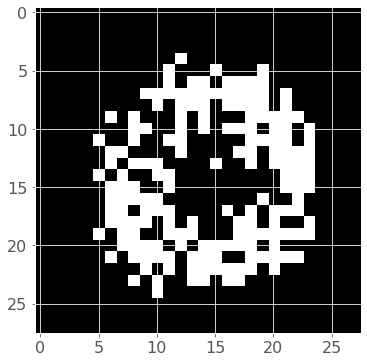

In [19]:
noise = tf.random.normal(shape=[1, INPUT_SIZE])
generated_image = generator(noise)
plt.imshow(generated_image[0], cmap='gray');

# A conditional GAN

In [ ]:
https://wiseodd.github.io/techblog/2016/12/24/conditional-gan-tensorflow/